## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('hearing_test.csv')

In [6]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [10]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [12]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

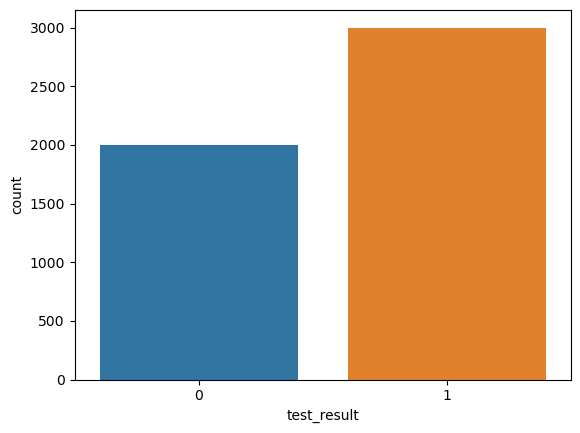

In [14]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

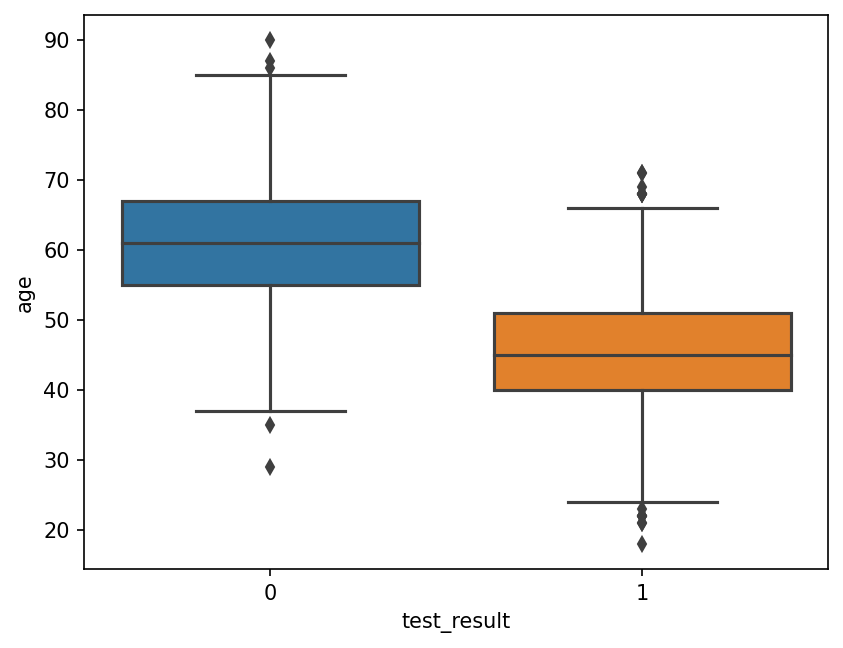

In [16]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

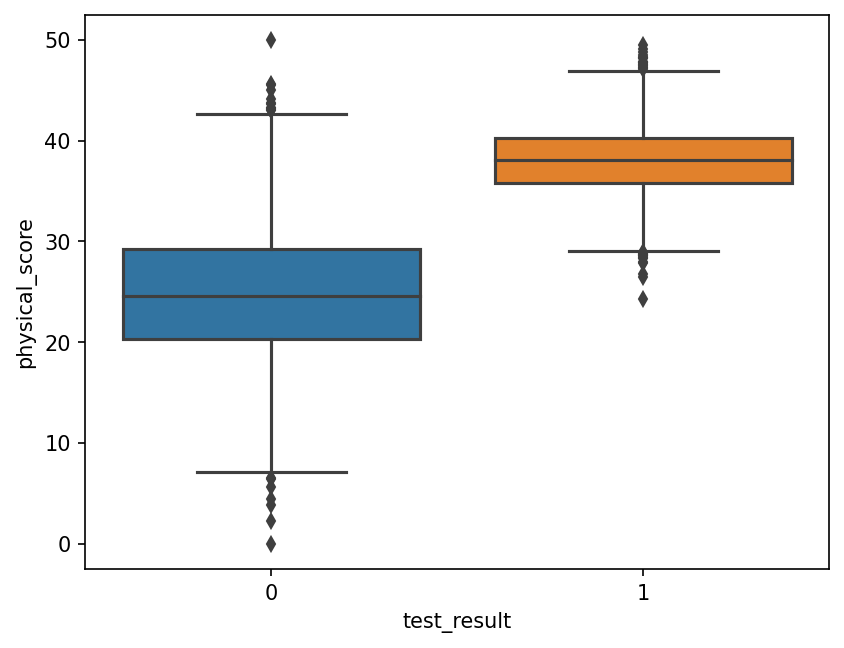

In [18]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

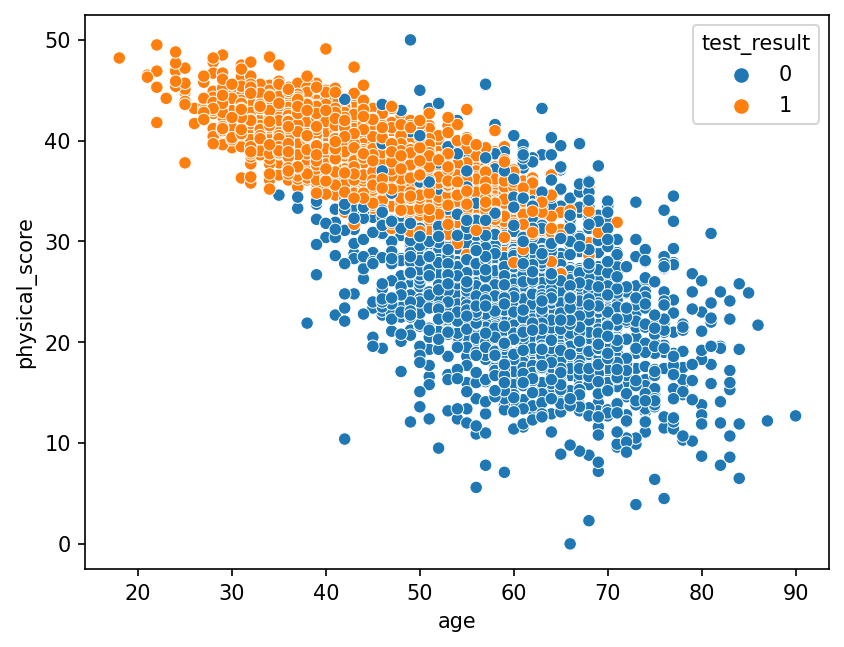

In [20]:
plt.figure(dpi=150)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

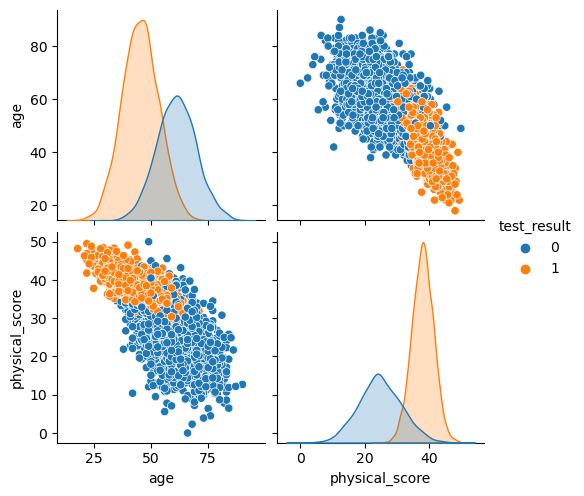

In [22]:
sns.pairplot(df,hue='test_result')

<Axes: >

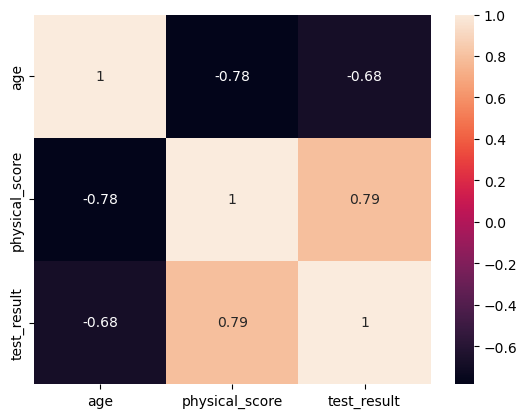

In [23]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

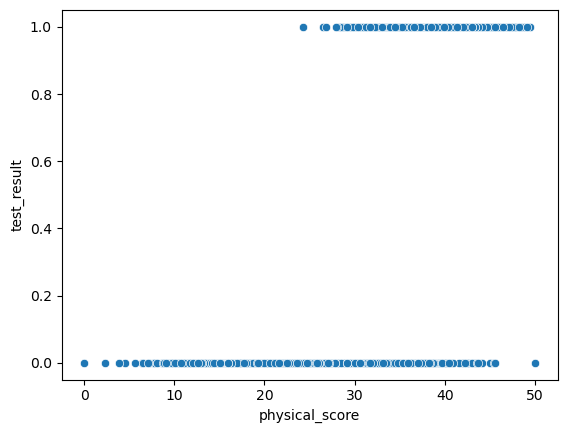

In [25]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

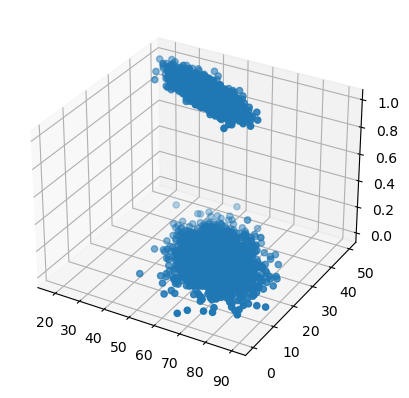

In [28]:
# for 3d satterplot graph
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'])

In [30]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [38]:
scaler=StandardScaler()

In [40]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [48]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [54]:
y_pred = log_model.predict_proba(X_test)

In [56]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [58]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
y_pred=log_model.predict(X_test)

In [64]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [66]:
accuracy_score(y_test,y_pred)

0.93

In [74]:
cm=confusion_matrix(y_test,y_pred)

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

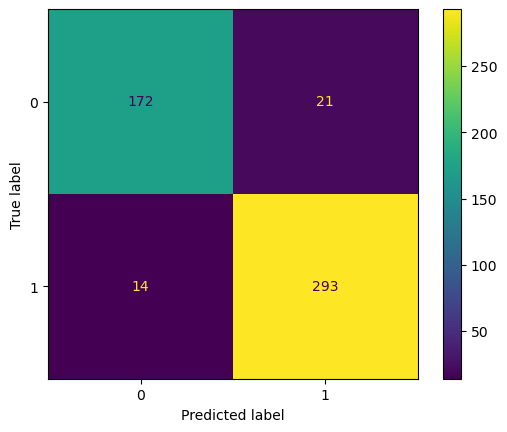

In [82]:
plot=ConfusionMatrixDisplay(confusion_matrix=cm)
plot.plot()
plt.show()

In [84]:
len(y_test)

500

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [88]:
from sklearn.metrics import precision_score,recall_score

In [90]:
precision_score(y_test,y_pred)

0.9331210191082803

In [92]:
recall_score(y_test,y_pred)

0.9543973941368078

In [100]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

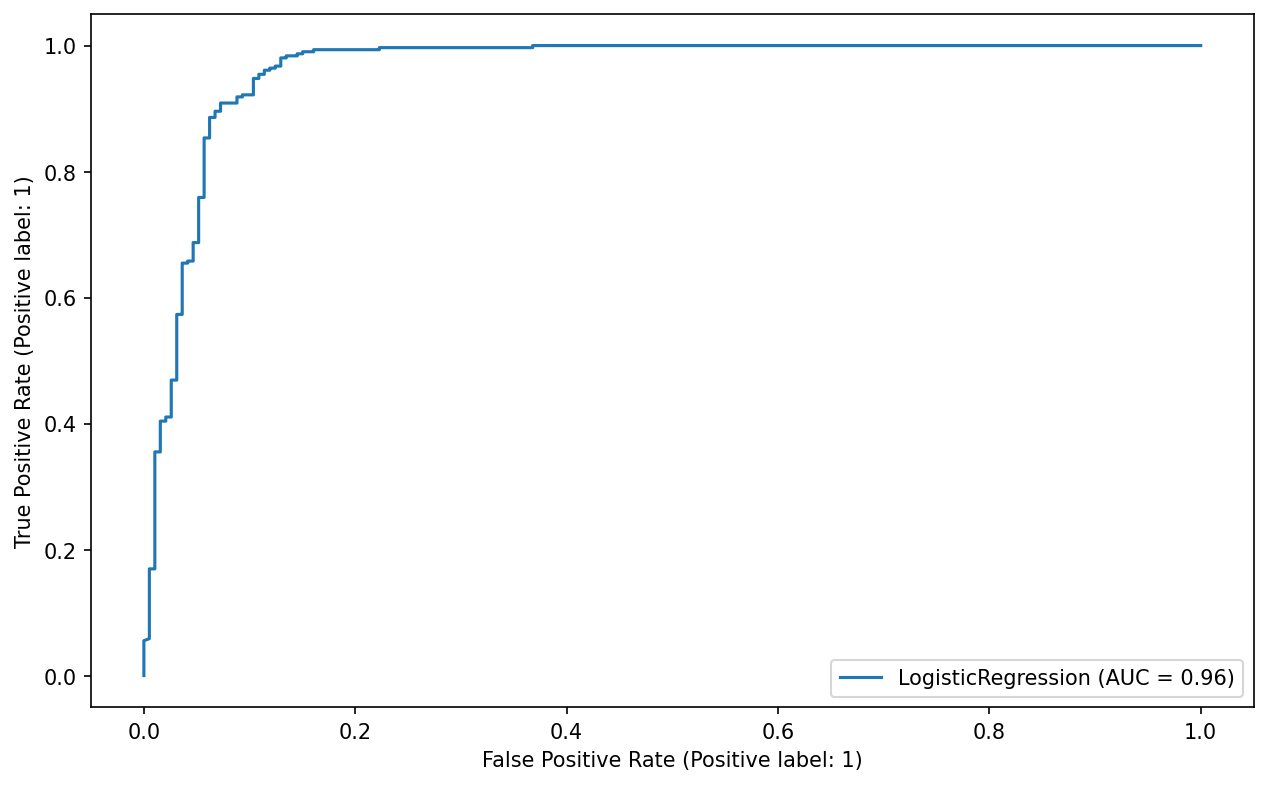

In [108]:
fig,ax = plt.subplots(figsize=(10,6),dpi=150)
RocCurveDisplay.from_estimator(log_model, X_test, y_test,ax=ax)

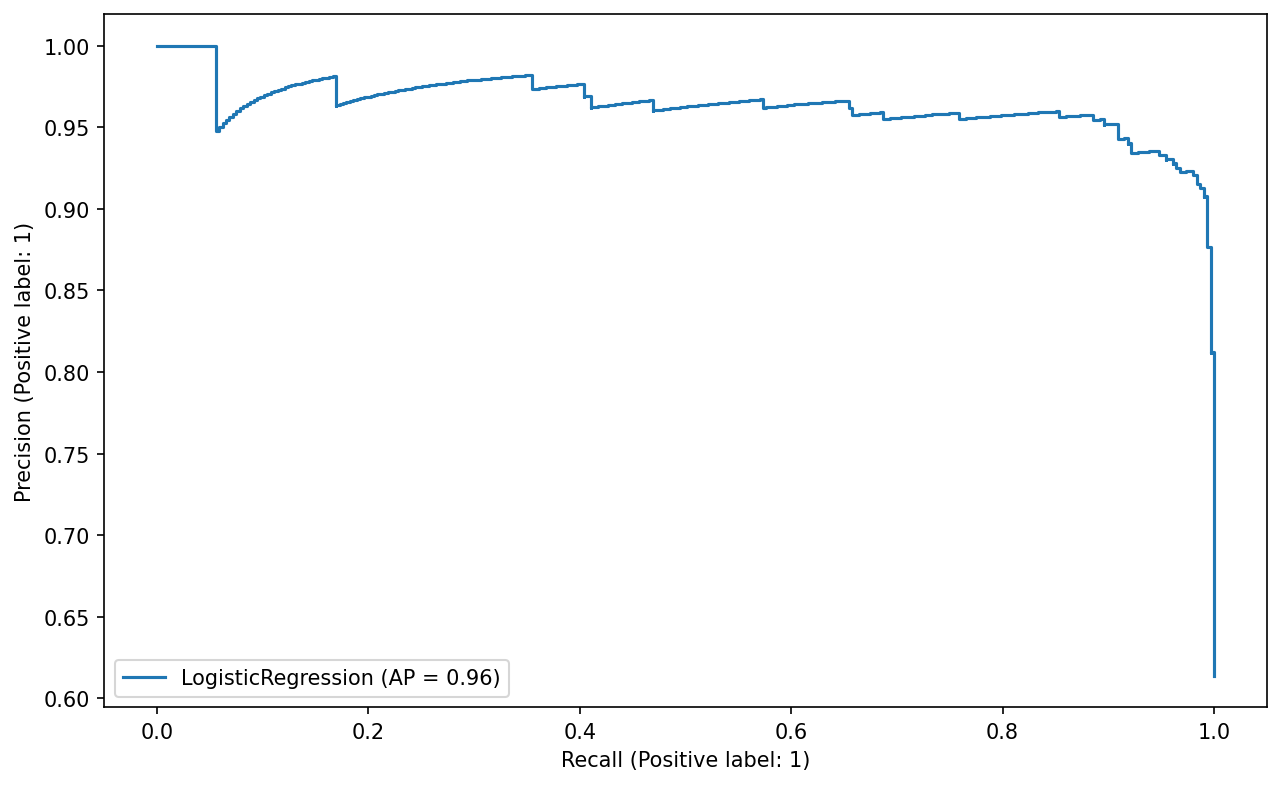

In [110]:
fig,ax = plt.subplots(figsize=(10,6),dpi=150)
PrecisionRecallDisplay.from_estimator(log_model,X_test,y_test,ax=ax)

In [118]:
log_model.predict_proba(X_test)[0]

array([0.02384343, 0.97615657])

In [114]:
y_test[0]

1